# 使用seaborn生成相关性热力图

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../data/house-price/train.csv",
usecols = ['Neighborhood','YearBuilt','OverallQual','OverallCond','ExterCond','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','GarageArea','GarageCond','PoolArea','MoSold','SalePrice']
)

In [9]:
df.head(10)

,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterCond,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,GarageArea,GarageCond,PoolArea,MoSold,SalePrice
0,CollgCr,7,5,2003,TA,3,1,8,Typ,548,TA,0,2,208500
1,Veenker,6,8,1976,TA,3,1,6,Typ,460,TA,0,5,181500
2,CollgCr,7,5,2001,TA,3,1,6,Typ,608,TA,0,9,223500
3,Crawfor,7,5,1915,TA,3,1,7,Typ,642,TA,0,2,140000
4,NoRidge,8,5,2000,TA,4,1,9,Typ,836,TA,0,12,250000
5,Mitchel,5,5,1993,TA,1,1,5,Typ,480,TA,0,10,143000
6,Somerst,8,5,2004,TA,3,1,7,Typ,636,TA,0,8,307000
7,NWAmes,7,6,1973,TA,3,1,7,Typ,484,TA,0,11,200000
8,OldTown,7,5,1931,TA,2,2,8,Min1,468,TA,0,4,129900
9,BrkSide,5,6,1939,TA,2,2,5,Typ,205,TA,0,1,118000


In [10]:
df.corr()

,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PoolArea,MoSold,SalePrice
OverallQual,1.000000,-0.091932,0.572323,0.101676,-0.183882,0.427452,0.562022,0.065166,0.070815,0.790982
OverallCond,-0.091932,1.000000,-0.375983,0.012980,-0.087001,-0.057583,-0.151521,-0.001985,-0.003511,-0.077856
YearBuilt,0.572323,-0.375983,1.000000,-0.070651,-0.174800,0.095589,0.478954,0.004950,0.012398,0.522897
BedroomAbvGr,0.101676,0.012980,-0.070651,1.000000,0.198597,0.676620,0.065253,0.070703,0.046544,0.168213
KitchenAbvGr,-0.183882,-0.087001,-0.174800,0.198597,1.000000,0.256045,-0.064433,-0.014525,0.026589,-0.135907
TotRmsAbvGrd,0.427452,-0.057583,0.095589,0.676620,0.256045,1.000000,0.337822,0.083757,0.036907,0.533723
GarageArea,0.562022,-0.151521,0.478954,0.065253,-0.064433,0.337822,1.000000,0.061047,0.027974,0.623431
PoolArea,0.065166,-0.001985,0.004950,0.070703,-0.014525,0.083757,0.061047,1.000000,-0.033737,0.092404
MoSold,0.070815,-0.003511,0.012398,0.046544,0.026589,0.036907,0.027974,-0.033737,1.000000,0.046432
SalePrice,0.790982,-0.077856,0.522897,0.168213,-0.135907,0.533723,0.623431,0.092404,0.046432,1.000000


<AxesSubplot:>

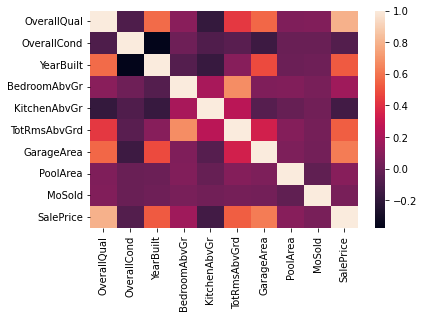

In [11]:
sns.heatmap(df.corr())

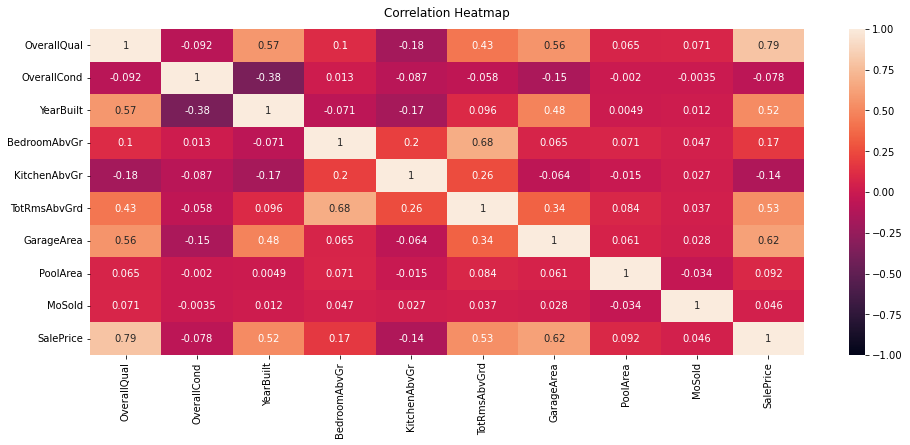

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


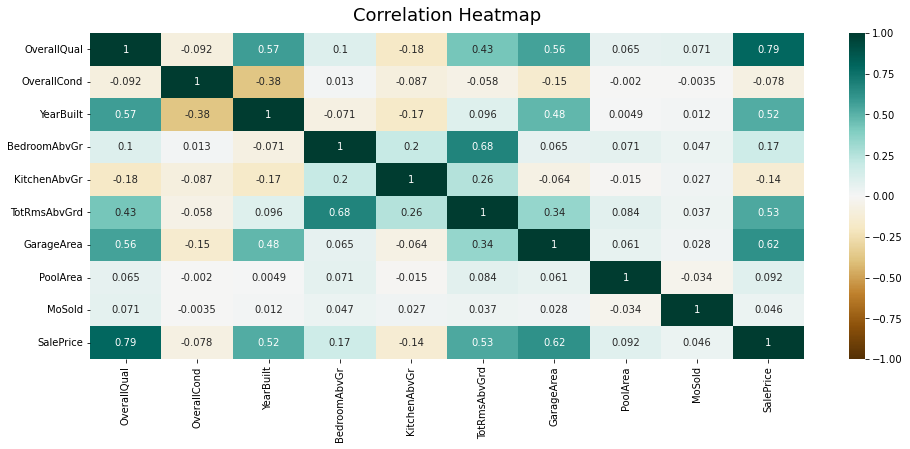

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


/tmp/ipykernel_691/3369424728.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

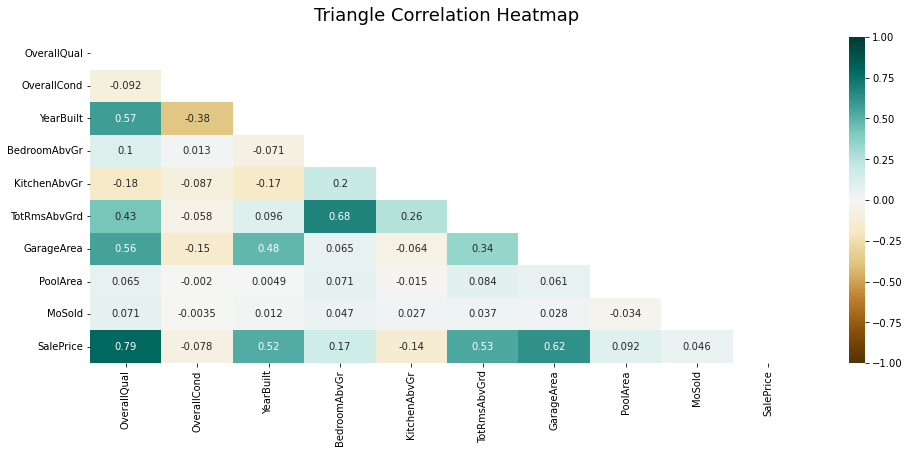

In [14]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [17]:
df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GarageArea,0.623431
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
BedroomAbvGr,0.168213
PoolArea,0.092404
MoSold,0.046432
OverallCond,-0.077856
KitchenAbvGr,-0.135907


Text(0.5, 1.0, 'Features Correlating with Sales Price')

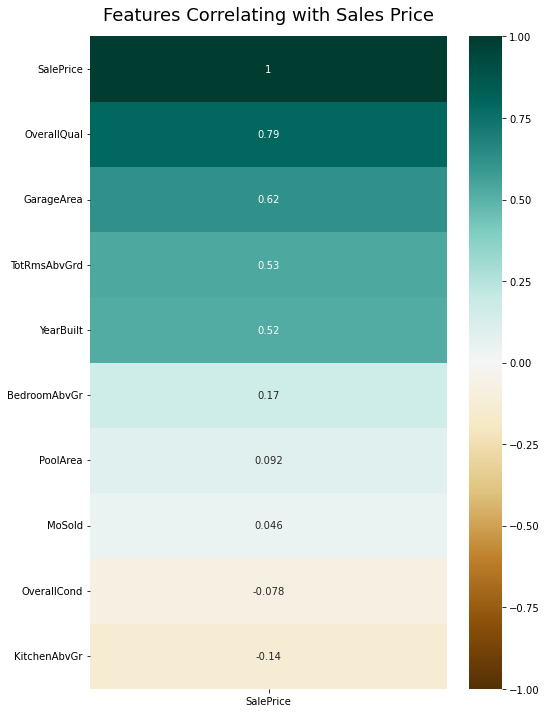

In [18]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)